In [22]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix, adjusted_rand_score

In [5]:
from sklearn.datasets import fetch_20newsgroups
newsgroups = fetch_20newsgroups(subset='all')
print("Number of samples:", len(newsgroups.data))
print("Number of categories:", len(newsgroups.target_names))
print("Categories:")
print(newsgroups.target_names[:5], "...")  # first 5 for example


Number of samples: 18846
Number of categories: 20
Categories:
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware'] ...


In [6]:
texts = newsgroups.data
labels = newsgroups.target

In [7]:
#Apply TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
tfidf_matrix = vectorizer.fit_transform(texts)
print("TF-IDF Matrix shape:", tfidf_matrix.shape)

TF-IDF Matrix shape: (18846, 173446)


In [8]:
#Dimensionality Reduction using SVD
svd = TruncatedSVD(n_components=100, random_state=42)
svd_matrix = svd.fit_transform(tfidf_matrix)
print("SVD Reduced Matrix shape:", svd_matrix.shape)

SVD Reduced Matrix shape: (18846, 100)


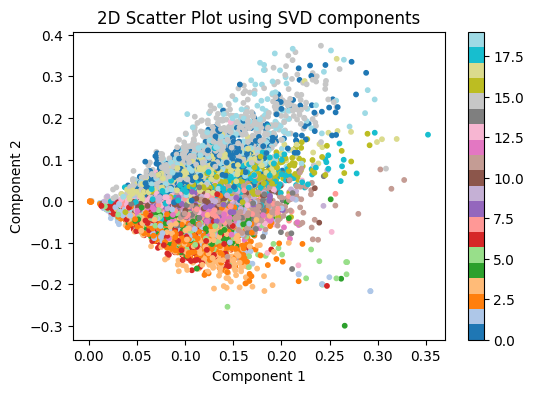

In [14]:
# STEP 5: Visualize First 2 Components
plt.figure(figsize=(6, 4))
plt.scatter(svd_matrix[:, 0], svd_matrix[:, 1], c=labels, cmap='tab20', s=10)
plt.title("2D Scatter Plot using SVD components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar()
plt.show()

In [19]:
#Apply KMeans Clustering (20 clusters)
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=20, random_state=42)
predicted_clusters = kmeans.fit_predict(svd_matrix)
# Silhouette Score
sil_score = silhouette_score(svd_matrix, predicted_clusters)
print("Silhouette Score for KMeans with 20 clusters:", sil_score)

Silhouette Score for KMeans with 20 clusters: 0.04013636872431418


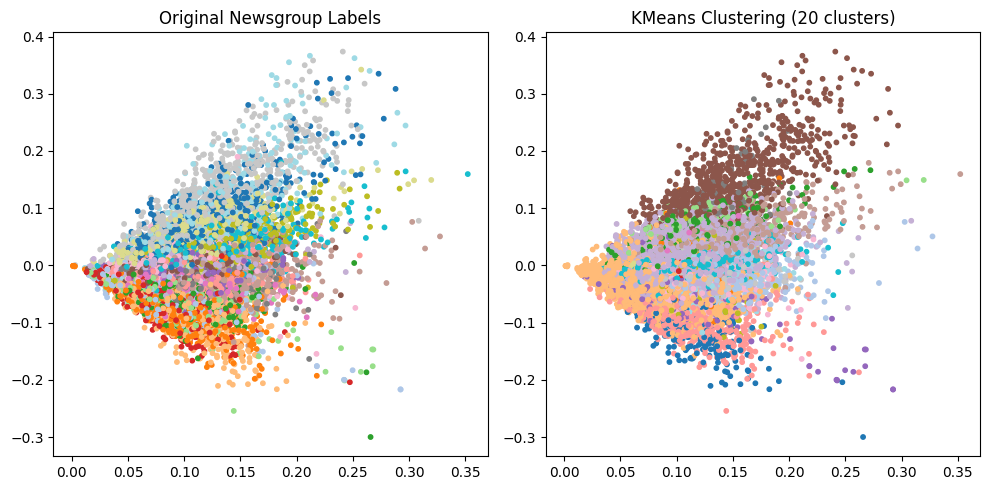

In [29]:
#Visualising Clustering vs Actual
plt.figure(figsize=(10, 5))
# True labels
plt.subplot(1, 2, 1)
plt.scatter(svd_matrix[:, 0], svd_matrix[:, 1], c=labels, cmap='tab20', s=10)
plt.title("Original Newsgroup Labels")
# Predicted clusters
plt.subplot(1, 2, 2)
plt.scatter(svd_matrix[:, 0], svd_matrix[:, 1], c=predicted_clusters, cmap='tab20', s=10)
plt.title("KMeans Clustering (20 clusters)")

plt.tight_layout()
plt.show()